📊 Evaluation Metrics:
✅ Accuracy: 0.35
🎯 Precision: 0.40
🔁 Recall: 0.35


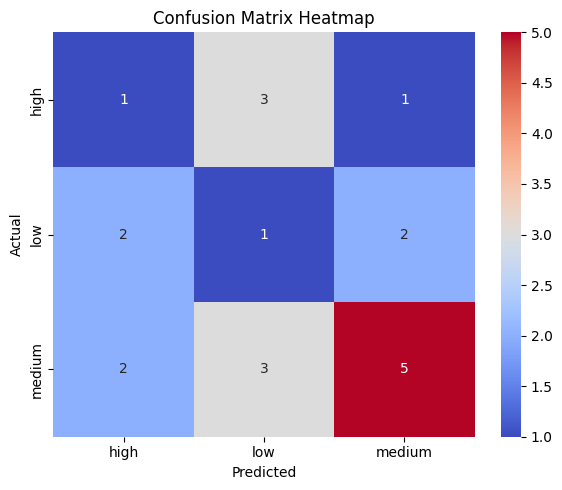

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
df = pd.read_csv('/content/health_risk.csv')

# Encode the target column (risk_level)
le_risk = LabelEncoder()
df['risk_level'] = le_risk.fit_transform(df['risk_level'].astype(str))

# Features and target
X = df[['bmi', 'exercise_hours', 'junk_food_freq']]
y = df['risk_level']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("📊 Evaluation Metrics:")
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"🎯 Precision: {precision:.2f}")
print(f"🔁 Recall: {recall:.2f}")

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()
